# Simulation testing
Testing embedding and fractal dimension code with colored noise and Lorentz attractor.

In [101]:
%load_ext autoreload
%autoreload 2
    
%matplotlib inline
import time
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sys.path.append('/Users/rdgao/Documents/code/research/SpaceRecon/')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')

import neurodsp.spectral as spectral
from nlds import delayembed as de
from nlds import dfa, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

def sim_lorenz(T, fs, init, args):
    t = np.arange(0,T,1/fs)
    f = odeint(lorenz, init, t, args)
    x, y, z = f.T
    return x,y,z

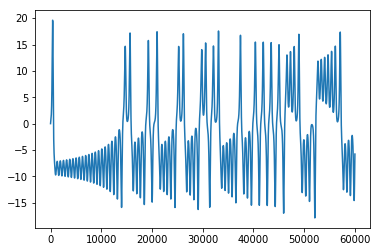

In [247]:
# Lorenz paramters and initial conditions
T,fs = 60,1000
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05
x,y,z = sim_lorenz(T,fs,init=(u0, v0, w0), args=(sigma, beta, rho))
plt.plot(x)

### Testing my code runtime speed

(157, 0.8851322990337012)


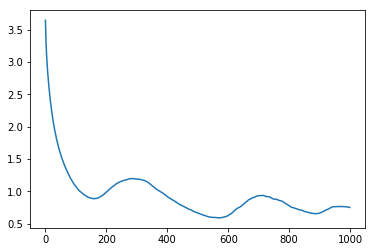

In [248]:
tMI, dMI = de.compute_delay_MI(x,50,1000)
opt_delay = de.find_valley(dMI)
print(opt_delay)
plt.plot(dMI)

3 [0.99939205 0.0539897  0.         0.         0.        ]


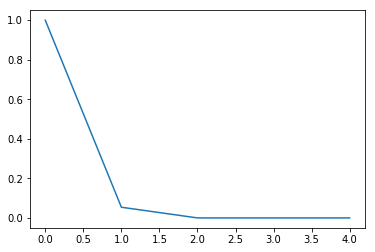

In [249]:
# del_R, rel_R = de.compute_nn_dist(x,opt_delay[0],5)
# recon_dim, pfnn = de.compute_attractor_dim(del_R,rel_R)
recon_dim, pfnn = de.pfnn_de_dim(x,opt_delay[0])
plt.plot(pfnn)
print(recon_dim, pfnn)

### DFA test
Generate colored noise and compute Hurst exponent.

True slope: 0.500000
PSD slope: 0.504556
DFA Hurst exp & DFA estimated power law exp: 0.748982, 0.497964


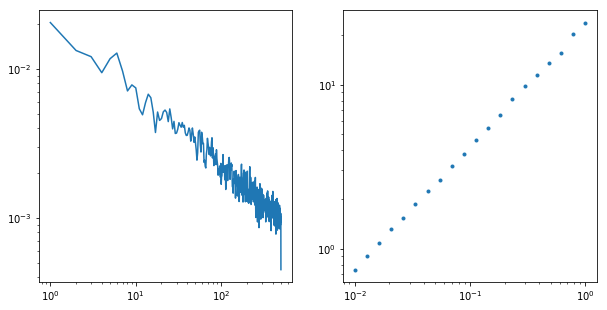

In [253]:
exp = -0.5
fs = 1000
T = 40
# generate colored noise with expected power law exponent
x = utils.sim_powerlaw_signal(T,fs,exponent=exp)
f_axis,psd = spectral.psd(x,1000)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(f_axis,psd)
print('True slope: %f'%-exp)
print('PSD slope: %f'%-spectral.fit_slope(f_axis,psd,(1,300))[0])

#dfa
t_scales, df, alpha = dfa.dfa(x,fs,n_scales=20, deg=1)
print('DFA Hurst exp & DFA estimated power law exp: %f, %f' %(alpha, 2*alpha-1))
plt.subplot(1,2,2)
plt.loglog(t_scales, df, '.');

